In [69]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [70]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [71]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "AllPlants",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [73]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [74]:
len(dataset)

68

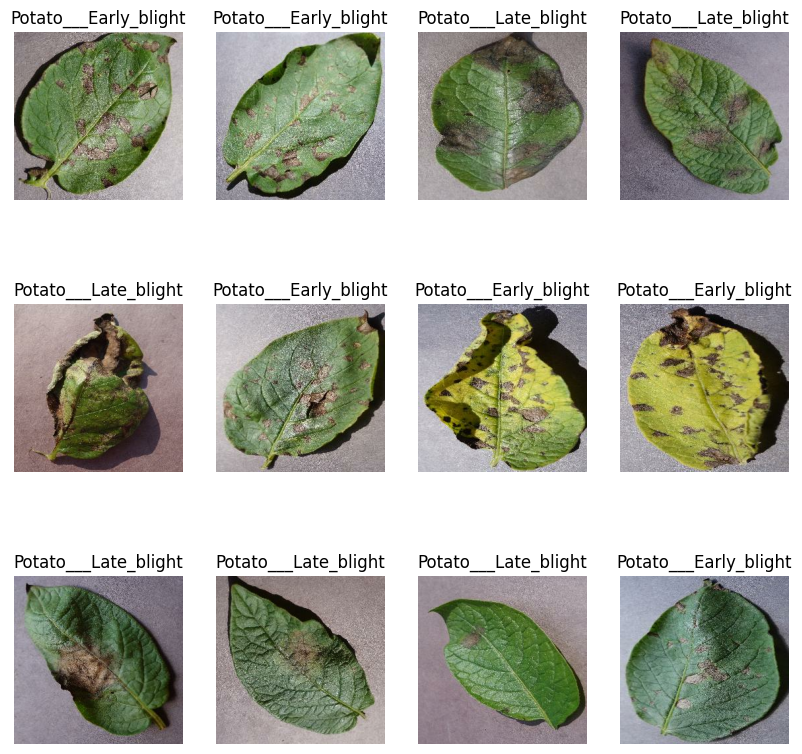

In [75]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    # print(image_batch[0].shape)
    # print(image_batch.shape)
    # print(label_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [76]:
# Dataset Division
# 80% ==> Trainging
# 10% ==> Validatin(During training period, at the end of every epoch, this 10% dataset will be used to test the model)
# 10% ==> Test

In [77]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [78]:
train_ds = dataset.take(54)
len(train_ds)

54

In [79]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [80]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [81]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [82]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [83]:
def get_dataset_partition_tf(
    ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000
):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    test_size = int(ds_size * test_split)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)

    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [84]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [85]:
len(train_ds)

54

In [86]:
len(val_ds)

6

In [87]:
len(test_ds)

8

In [88]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [89]:
resize_and_rescale = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0 / 255),
    ]
)

In [90]:
data_augmentation = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2),
    ]
)

In [92]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential(
    [
        resize_and_rescale,
        data_augmentation,
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(n_classes, activation="softmax"),
    ]
)

model.build(input_shape=input_shape)

In [93]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [94]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [98]:
history = model.fit(
    train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 126s 2s/step - loss: 0.9026 - accuracy: 0.4712 - val_loss: 0.8956 - val_accuracy: 0.5417
Epoch 2/50
54/54 [==============================] - 93s 2s/step - loss: 0.7883 - accuracy: 0.6391 - val_loss: 0.6609 - val_accuracy: 0.7031
Epoch 3/50
54/54 [==============================] - 88s 2s/step - loss: 0.5477 - accuracy: 0.7764 - val_loss: 0.4666 - val_accuracy: 0.8333
Epoch 4/50
54/54 [==============================] - 92s 2s/step - loss: 0.3720 - accuracy: 0.8580 - val_loss: 0.2919 - val_accuracy: 0.8958
Epoch 5/50
54/54 [==============================] - 105s 2s/step - loss: 0.2524 - accuracy: 0.8996 - val_loss: 0.1927 - val_accuracy: 0.9375
Epoch 6/50
54/54 [==============================] - 94s 2s/step - loss: 0.2113 - accuracy: 0.9137 - val_loss: 0.2113 - val_accuracy: 0.9219
Epoch 7/50
54/54 [==============================] - 92s 2s/step - loss: 0.1741 - accuracy: 0.9302 - val_loss: 0.3410 - val_accuracy: 0.8698
Epoch 8/50
54/54 [

In [99]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 479ms/step - loss: 0.0840 - accuracy: 0.9688


In [103]:
scores

[0.08404533565044403, 0.96875]

In [104]:
history

In [105]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [106]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [107]:
accu = history.history["accuracy"]
val_accu = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

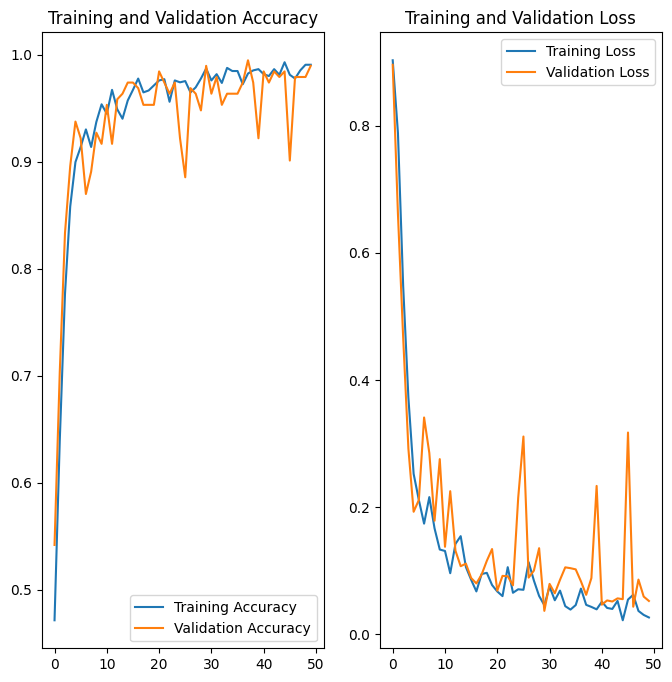

In [108]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accu, label="Training Accuracy")
plt.plot(range(EPOCHS), val_accu, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()

First image to predict
Actual label: Potato___Late_blight
1/1 [==============================] - 1s 763ms/step
Predicted label: Potato___Late_blight


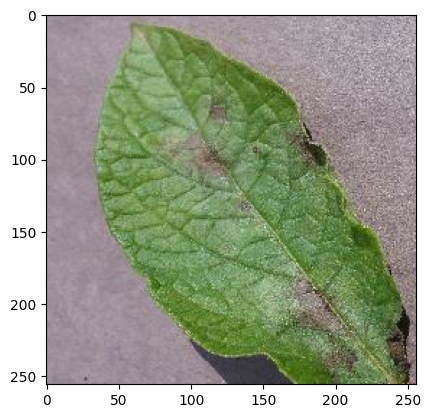

In [109]:
import numpy as np

for image_batch, label_batch in test_ds.take(1):
    # plt.imshow(image_batch[0].numpy().astype('uint8'))
    # print(image_batch[0].numpy().astype('uint8'))
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [110]:
def predict(model, img):
    # img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 47ms/step


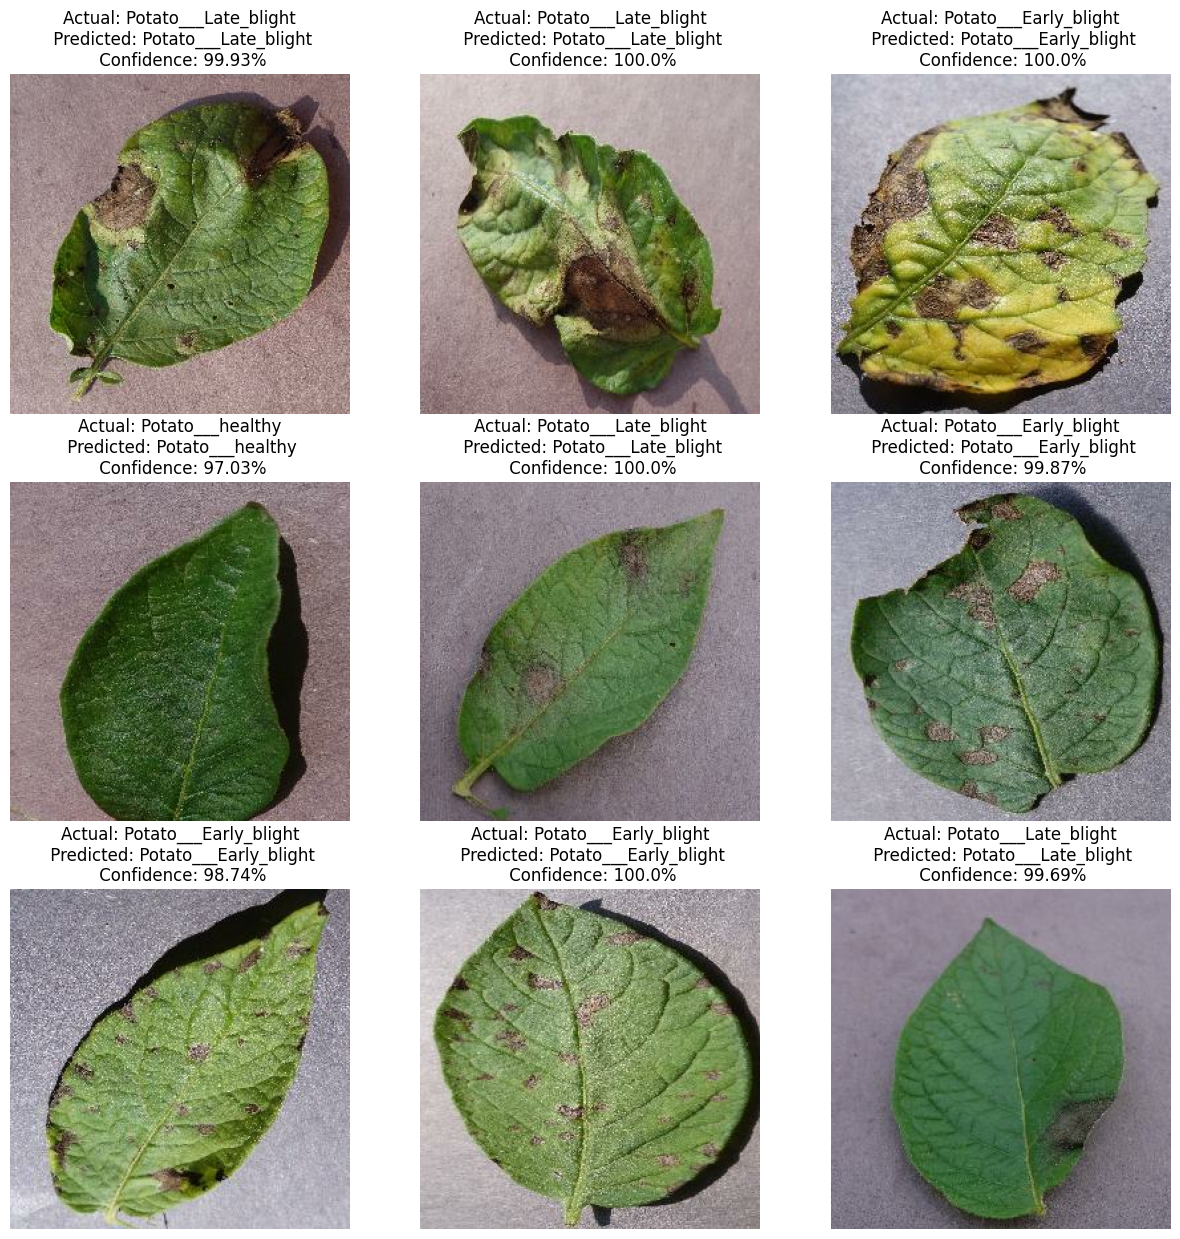

In [111]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class}\n Predicted: {predicted_class}\n Confidence: {confidence}%"
        )

        plt.axis("off")

In [ ]:
import os
model_version = max([int(i) for i in os.listdir("../models/")]) + 1
model.save(f"../models/{model_version}")